<a href="https://colab.research.google.com/github/AmirRezaBehzad/Image-encryption-and-decryption-using-Rubiks-cube-algorithm/blob/main/Image_Encryption_Decryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image's shape is (1132, 800, 3)
Grayscale image's shape is (1132, 800)


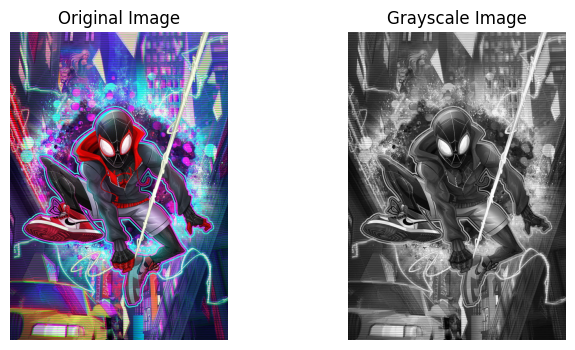

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image_path = '/content/Spider_man2.jpg'
original_image = cv2.imread(image_path)

# Convert the original image to grayscale
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images side by side
plt.figure(figsize=(8, 4))

# Subplot for the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Subplot for the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')

print(f"Original image's shape is {original_image.shape}")
print(f"Grayscale image's shape is {grayscale_image.shape}")

plt.show()

Text(0, 0.5, 'Frequency')

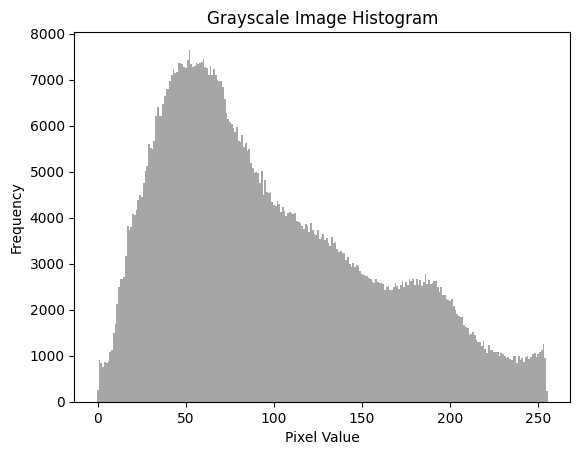

In [76]:
# Calculate the histogram
hist, bins = np.histogram(grayscale_image.flatten(), bins=256, range=[0, 256])

# Plot the histogram with actual counts
plt.bar(bins[:-1], hist, width=1, color='gray', alpha=0.7)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

In [86]:
# Start of Encrypting the image

# Get the dimensions of the grayscale image
M = grayscale_image.shape[0]
N = grayscale_image.shape[1]

# Set the hyperparameter alpha for encryption (adjust as needed)
alpha = 10

# Create vectors to store random values for row and column shifts
vector_Kr = np.zeros(M)
vector_Kc = np.zeros(N)

# Arrays to store sum of pixel values in rows and columns
Alpha_array = np.zeros(M)
Beta_array = np.zeros(N)

# Create an array with numbers from 0 to (2^alpha) - 1
number_array = np.arange(2**alpha)

# Generate random values for vector_Kr and vector_Kc
for i in range(M):
  random_index = np.random.randint(0, len(number_array))
  vector_Kr[i] = number_array[random_index]
for j in range(N):
  random_index = np.random.randint(0, len(number_array))
  vector_Kc[j] = number_array[random_index]

image_array = grayscale_image.copy()

# Calculate the sum of pixel values in each row
for i in range(M):
  for j in range(N):
    Alpha_array[i] += image_array[i][j]

# Apply modulo 2 to obtain binary values for row
for i in range(M):
  Alpha_array[i] = Alpha_array[i] % 2

# Circular shift rows based on Alpha_array and vector_Kr
for i in range(M):
  if Alpha_array[i] == 0:
     image_array[i] = np.roll(image_array[i], shift=int(vector_Kr[i]))
  elif Alpha_array[i] == 1:
    image_array[i] = np.roll(image_array[i], shift=int(-vector_Kr[i]))

# Calculate the sum of pixel values in each column
for i in range(N):
  for j in range(M):
    Beta_array[i] += image_array[j][i]

# Apply modulo 2 to obtain binary values for column sums
for i in range(N):
  Beta_array[i] = Beta_array[i] % 2

# Circular shift columns based on Beta_array and vector_Kc
for j in range(N):
    if Beta_array[j] == 1:
        image_array[:, j] = np.roll(image_array[:, j], shift=int(vector_Kc[j]))
    elif Beta_array[j] == 0:
        image_array[:, j] = np.roll(image_array[:, j], shift=-int(vector_Kc[j]))


# Second part of encrypting the image
# Apply XOR operation on alternate rows with vector_Kc
for i in range(M):
    for j in range(N):
        if i % 2 == 0:  # Check if i is even
            image_array[i, j] = int(image_array[i, j]) ^ int(vector_Kc[j])
        else:
            flipped_vector_Kc = np.flip(vector_Kc)
            image_array[i, j] = int(image_array[i, j]) ^ int(flipped_vector_Kc[j])

# Apply XOR operation on alternate columns with vector_Kr
for j in range(N):
    for i in range(M):
        if j % 2 == 0:  # Check if j is even
            image_array[i, j] = int(image_array[i, j]) ^ int(vector_Kr[i])
        else:
            flipped_vector_Kr = np.flip(vector_Kr)
            image_array[i, j] = int(image_array[i, j]) ^ int(flipped_vector_Kr[i])

# End of encrypting the image


encrypted_image = image_array.copy()

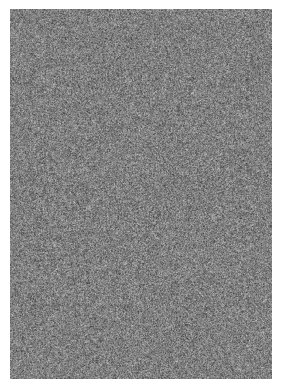

In [87]:
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

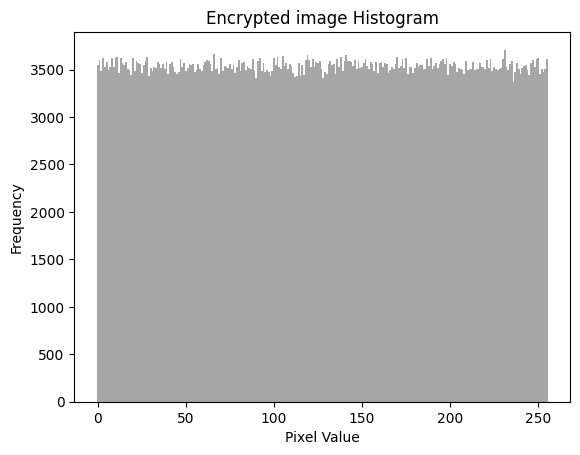

In [88]:
# Calculate the histogram
hist, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

# Plot the histogram with actual counts
plt.bar(bins[:-1], hist, width=1, color='gray', alpha=0.7)
plt.title('Encrypted image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

In [89]:
# Start of decrypting the image

# Applying XOR on columns during decryption
for j in range(N):
    for i in range(M):
        if j % 2 == 0:  # Check if j is even
            image_array[i, j] = int(image_array[i, j]) ^ int(vector_Kr[i])
        else:
            flipped_vector_Kr = np.flip(vector_Kr)
            image_array[i, j] = int(image_array[i, j]) ^ int(flipped_vector_Kr[i])

# Applying XOR on rows during decryption
for i in range(M):
    for j in range(N):
        if i % 2 == 0:  # Check if i is even
            image_array[i, j] = int(image_array[i, j]) ^ int(vector_Kc[j])
        else:
            flipped_vector_Kc = np.flip(vector_Kc)
            image_array[i, j] = int(image_array[i, j]) ^ int(flipped_vector_Kc[j])


# Second part of decrypting the image
# Initialize arrays for row and column sums during decryption
Alpha_array2 = np.zeros(M)
Beta_array2 = np.zeros(N)

# Calculate column sums for the decrypted image
for i in range(N):
  for j in range(M):
    Beta_array2[i] += image_array[j][i]

# Apply modulo 2 to obtain binary values for column sums
for i in range(N):
  Beta_array2[i] = Beta_array2[i] % 2

# Adjust image based on calculated Beta values during decryption
for j in range(N):
  if Beta_array2[j] == 0:
      image_array[:, j] = np.roll(image_array[:, j], shift=int(vector_Kc[j]))
  elif Beta_array2[j] == 1:
      image_array[:, j] = np.roll(image_array[:, j], shift=-int(vector_Kc[j]))

# Calculate row sums for the decrypted image
for i in range(M):
  for j in range(N):
    Alpha_array2[i] += image_array[i][j]

# Apply modulo 2 to obtain binary values for row sums
for i in range(M):
  Alpha_array2[i] = Alpha_array2[i] % 2

# Adjust image based on calculated Alpha values during decryption
for i in range(M):
  if Alpha_array2[i] == 1:
    image_array[i] = np.roll(image_array[i], shift=int(vector_Kr[i]))
  elif Alpha_array2[i] == 0:
    image_array[i] = np.roll(image_array[i], shift=int(-vector_Kr[i]))

# End of decrypting the image

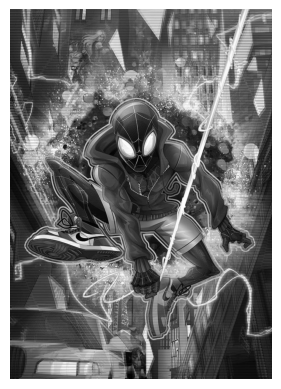

In [90]:
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

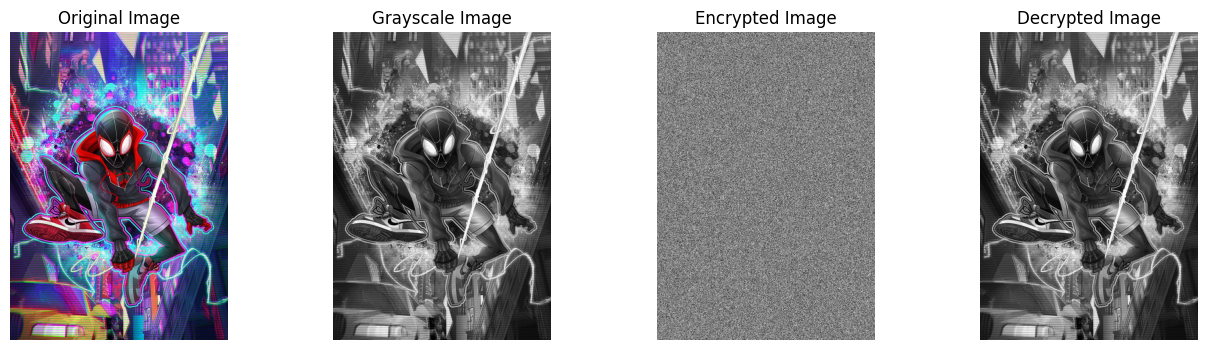

In [91]:
# Display the original, grayscale, encrypted, and decrypted images side by side
plt.figure(figsize=(16, 4))

# Subplot for the original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Subplot for the grayscale image
plt.subplot(1, 4, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')

# Subplot for the encrypted image
plt.subplot(1, 4, 3)
plt.imshow(encrypted_image, cmap="gray")  # Assuming encrypted_image is defined
plt.title("Encrypted Image")
plt.axis('off')

# Subplot for the decrypted image
plt.subplot(1, 4, 4)
plt.imshow(image_array, cmap="gray")  # Assuming image_array is defined
plt.title("Decrypted Image")
plt.axis('off')

plt.show()